##Tirmzi Analysis
n=1000 m+=1000 nm-=120 istep= 4 min=150 max=700

In [1]:
import sys
sys.path
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal
from capsol.spherecheck import sphereMetalCap

In [2]:
ls

 Volume in drive C is Local Disk
 Volume Serial Number is AA1B-997A

 Directory of C:\Users\emaro\OneDrive - University of Mount Union\XSEDE Summer 2021\xsede-spm\data

08/03/2021  01:49 PM    <DIR>          .
08/03/2021  01:49 PM    <DIR>          ..
08/03/2021  01:34 PM    <DIR>          .ipynb_checkpoints
08/02/2021  02:01 PM    <DIR>          0309-VariedNuni_8_2_2021-0000
08/02/2021  02:15 PM    <DIR>          8_2_2021
08/02/2021  02:18 PM           152,527 8_2_2021_FortranVariedNuni.ipynb
08/02/2021  03:39 PM           161,361 8_2_2021_FortranVariedNuni-Copy1.ipynb
08/03/2021  01:17 PM           130,779 8_2_2021_PythonVariedNuni.ipynb
08/02/2021  02:58 PM           130,726 8_2_2021_PythonVariedNuni-Copy1.ipynb
08/03/2021  01:20 PM           148,540 8_2_2021_PythonVariedNuni-Copy2.ipynb
08/03/2021  01:20 PM           130,779 8_2_2021_PythonVariedNuni-Copy3.ipynb
08/03/2021  01:22 PM           153,589 8_2_2021_PythonVariedNuni-Copy4.ipynb
08/03/2021  01:49 PM           122,048 8_2_2

In [3]:
import capsol.newanalyzecapsol as ac

In [4]:
ac.get_gridparameters

<function capsol.newanalyzecapsol.get_gridparameters(f_name)>

In [5]:
import glob

In [6]:
folders = glob.glob("SphereTest_P/*/")
folders


['SphereTest_P\\0322-Spheretest-0000\\',
 'SphereTest_P\\0324-Spheretest-0002\\',
 'SphereTest_P\\0326-Spheretest-0001\\']

In [7]:
all_data= dict() 
for folder in folders:
    params = ac.get_gridparameters(folder + 'capsol.in')
    data = ac.np.loadtxt(folder + 'C-Z.dat')
    process_data = ac.process_data(params, data, smoothing=False, std=5*10**-9, fortran=False)
    all_data[folder]= (process_data)
all_params= dict()
for folder in folders:
    params=ac.get_gridparameters(folder + 'capsol.in')
    all_params[folder]= (params)

In [8]:
all_data

{'SphereTest_P\\0322-Spheretest-0000\\': {'z': array([150., 152., 154., 156., 158., 160., 162., 164., 166., 168., 170.,
         172., 174., 176., 178., 180., 182., 184., 186., 188., 190., 192.,
         194., 196., 198., 200., 202., 204., 206., 208., 210., 212., 214.,
         216., 218., 220., 222., 224., 226., 228., 230., 232., 234., 236.,
         238., 240., 242., 244., 246., 248.]),
  'c': array([7.19109226e-18, 7.18406304e-18, 7.17719963e-18, 7.17049621e-18,
         7.16394726e-18, 7.15754748e-18, 7.15129183e-18, 7.14517548e-18,
         7.13919383e-18, 7.13334246e-18, 7.12761717e-18, 7.12201391e-18,
         7.11652882e-18, 7.11115819e-18, 7.10589848e-18, 7.10074627e-18,
         7.09569831e-18, 7.09075146e-18, 7.08590270e-18, 7.08114914e-18,
         7.07648801e-18, 7.07191663e-18, 7.06743243e-18, 7.06303294e-18,
         7.05871578e-18, 7.05447865e-18, 7.05031935e-18, 7.04623576e-18,
         7.04222581e-18, 7.03828755e-18, 7.03441905e-18, 7.03061848e-18,
         7.02688407

In [9]:
all_data.keys()

dict_keys(['SphereTest_P\\0322-Spheretest-0000\\', 'SphereTest_P\\0324-Spheretest-0002\\', 'SphereTest_P\\0326-Spheretest-0001\\'])

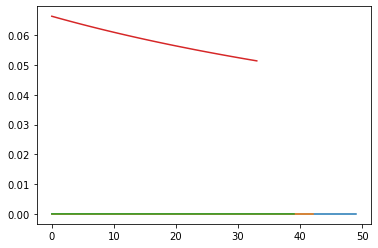

In [67]:
dz= (data['z'][1]-data['z'][0])*10**-9
dz
c_exact=[sphereMetalCap((params['Rtip']*1E-9), ((d+params['Rtip'])*1E-9)) for d in data['z']]
c_exact
plt.plot(c_exact)
cz_exact=cz=np.gradient(c_exact, dz)
cz_exact
s=slice(4,-3)
plt.plot(cz_exact[s])
czz_exact=np.gradient(cz_exact/dz)
s=slice(5,-5)
czz_exact
plt.plot(czz_exact[s])
alpha_exact=(2*(cz_exact**2/c_exact)/czz_exact)
alpha_exact
s=slice(8,-8)
plt.plot(alpha_exact[s])

array([-8.63562326e-22,  3.71791990e-18])

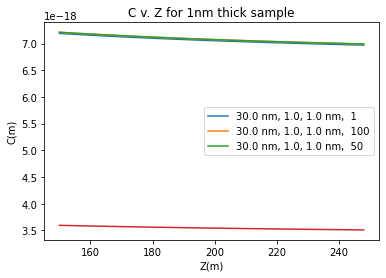

In [75]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness =all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    Nuni=all_params[key]['Nuni']
    plt.plot(data['z'], data['c'], label= f'{rtip} nm, {er}, {thickness} nm,  {Nuni}')
 
plt.plot(data['z'], c_exact)   
plt.title('C v. Z for 1nm thick sample')    
plt.ylabel("C(m)")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("C' v. Z for 1nm thick sample 06-28-2021.png")
slope=np.polyfit(data['z'], data['c'], 1)
slope_exact=np.polyfit(data['z'], c_exact, 1)
slope
slope_exact

cut off last experiment because capacitance was off the scale

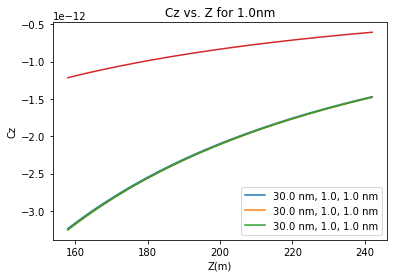

In [61]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(4,-3)
    plt.plot(data['z'][s], data['cz'][s],  label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.plot(data['z'][s], cz_exact[s])
plt.title('Cz vs. Z for 1.0nm')    
plt.ylabel("Cz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Cz v. Z for varying sample thickness, 06-28-2021.png")
plt

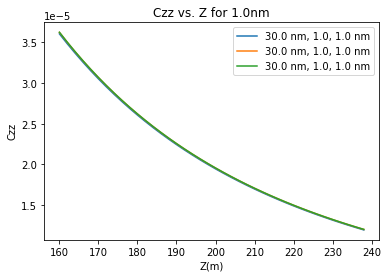

In [12]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(5,-5)
    plt.plot(data['z'][s], data['czz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.plot    
plt.title('Czz vs. Z for 1.0nm')    
plt.ylabel("Czz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [13]:
params

{'n': 1000,
 'm+': 1000,
 'm-': 2,
 'h0': 0.5,
 'rho_max': 1000000.0,
 'z_max': 1000000.0,
 'min': 150.0,
 'max': 250.0,
 'istep': 4.0,
 'Rtip': 30.0,
 'half-angle': 20.0,
 'HCone': 15000.0,
 'RCantilever': 13750.0,
 'thickness_Cantilever': 999.99,
 'eps_r': 1.0,
 'Thickness_sample': 1.0,
 'Solving Method': 'LAPACK',
 'Test': 1,
 'Verbosity': 0,
 'Nuni': 50,
 'Equally spaced': False}

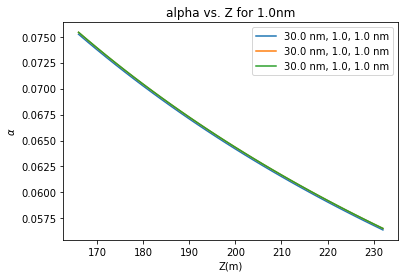

In [14]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 1.0}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(8,-8)
    plt.plot(data['z'][s], data['alpha'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('alpha vs. Z for 1.0nm')    
plt.ylabel("$\\alpha$")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Alpha v. Z for varying sample thickness, 06-28-2021.png")

In [15]:
data

{'z': array([150., 152., 154., 156., 158., 160., 162., 164., 166., 168., 170.,
        172., 174., 176., 178., 180., 182., 184., 186., 188., 190., 192.,
        194., 196., 198., 200., 202., 204., 206., 208., 210., 212., 214.,
        216., 218., 220., 222., 224., 226., 228., 230., 232., 234., 236.,
        238., 240., 242., 244., 246., 248.]),
 'c': array([7.21290276e-18, 7.20583492e-18, 7.19893379e-18, 7.19219353e-18,
        7.18560858e-18, 7.17917361e-18, 7.17288355e-18, 7.16673355e-18,
        7.16071899e-18, 7.15483542e-18, 7.14907861e-18, 7.14344450e-18,
        7.13792920e-18, 7.13252900e-18, 7.12724031e-18, 7.12205972e-18,
        7.11698394e-18, 7.11200982e-18, 7.10713433e-18, 7.10235457e-18,
        7.09766773e-18, 7.09307114e-18, 7.08856221e-18, 7.08413844e-18,
        7.07979746e-18, 7.07553695e-18, 7.07135469e-18, 7.06724855e-18,
        7.06321647e-18, 7.05925646e-18, 7.05536659e-18, 7.05154503e-18,
        7.04778999e-18, 7.04409974e-18, 7.04047263e-18, 7.03690703e-18,


In [16]:
from scipy.optimize import curve_fit


2e-09

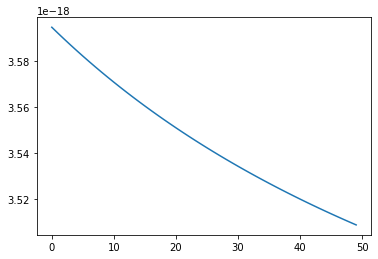

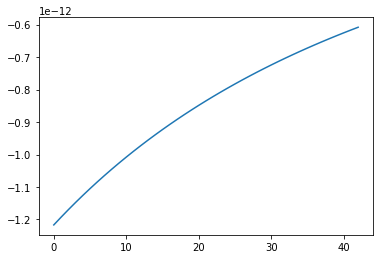

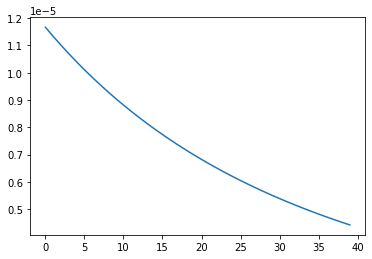

In [63]:
czz_exact=np.gradient(cz_exact/dz)
s=slice(5,-5)
czz_exact
plt.plot(czz_exact[s])alpha_exact=(2*(cz_exact**2/c_exact)/czz_exact)
alpha_exact
s=slice(8,-8)
plt.plot(alpha_exact[s])

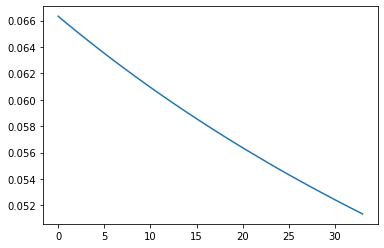

In [64]:
alpha_exact=(2*(cz_exact**2/c_exact)/czz_exact)
alpha_exact
s=slice(8,-8)
plt.plot(alpha_exact[s])

In [60]:
def Cz_model(z, a, n, b,):
    return(a*z**n + b)

In [19]:
all_data.keys()

dict_keys(['SphereTest_P\\0322-Spheretest-0000\\', 'SphereTest_P\\0324-Spheretest-0002\\', 'SphereTest_P\\0326-Spheretest-0001\\'])

In [20]:
data= all_data['capsol-calc\\0001-capsol\\']
z= data['z'][1:-1]
cz= data['cz'][1:-1]

KeyError: 'capsol-calc\\0001-capsol\\'

In [ ]:
popt, pcov= curve_fit(Cz_model, z, cz, p0=[cz[0]*z[0], -1, 0])
a=popt[0]
n=popt[1]
b=popt[2]
std_devs= np.sqrt(pcov.diagonal())
sigma_a = std_devs[0]
sigma_n = std_devs[1]
model_output= Cz_model(z, a, n, b)
rmse= np.sqrt(np.mean((cz - model_output)**2))


In [ ]:
f"a= {a} ± {sigma_a}"

In [ ]:
f"n= {n}± {sigma_n}"

In [ ]:
model_output

In [ ]:
"Root Mean Square Error"

In [ ]:
rmse/np.mean(-cz)